In [6]:
import Zip
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.gridspec as gridspec
import time
import math
import pickle
from preface import *

# Channels in the detector
det_ch = { 'tpc': list(range(0, 247+1)), 'veto': list(range(248, 253+1)), 
          'sum_wv': [254], 'busy_on': [255], 'busy_off': [256],
          'hev_on': [257], 'hev_off': [258], 'muon_veto_trigger': [259], } 
n_channels = 260

# The data files
NG = Zip.ReadZipped("/data/nikhefproject/data/xenon1t/NG") # Neutron data
Rn220 = Zip.ReadZipped("/data/nikhefproject/data/xenon1t/Rn220") # Rn-220 data

In [7]:
# A waveform reader function
def Waveform(eventnr,file):
    event = file.get_single_event(eventnr)
                                
    #The variables that check if a channel is the minimum channel
    adcmin = 16382
    minchannel = 0
    
    #A list that holds all the channels with significant pulses 
    channellist = []
    
    #Create the datapoint arrays
    n = 500000  #350000
    ts = np.ones((n_channels, n), dtype=np.int16)
    ts = ts * 16382 #baseline
    t = np.linspace(0, n, n) 
    
    #Loop over all pulses in the event
    for p in event.pulses:
        ch = p.channel
        i = np.zeros(n_channels, dtype = int)
        #print(p.channel, ": ", p.left, p.right-p.left)
        for adc in p.raw_data:
            
            #Add the ADC value to the appropriate channel array
            ts[ch][p.left + i[ch]] = adc
            i[ch] = i[ch] + 1
            
            #Append all significant main channels to the list
            if adc < 15000 and ch not in channellist and ch in det_ch['tpc']:
                channellist.append(ch)
                
            #Check which channel is the minimum channel
            if adc < adcmin:
                adcmin = adc
                minchannel = ch
                
    #Sort for convenience
    channellist.sort()
    return t, ts, channellist, minchannel


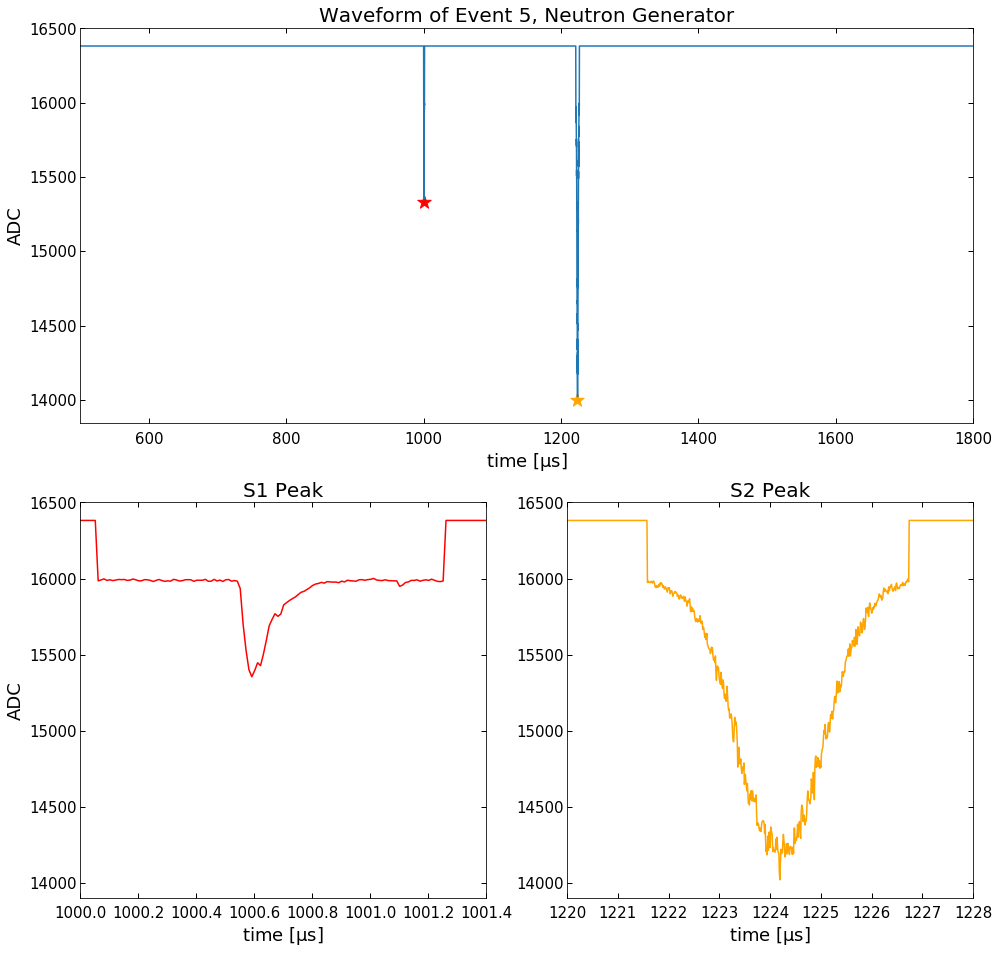

In [35]:
plt.rcParams["figure.figsize"] = (16, 16)
ax1 = plt.subplot(211)
ax1.plot(np.asarray(Input[0])/100., Input[1][254])
ax1.set_xlim(500., 1800.)
ax1.scatter([1000.55,],[15330,], s = 200, color = 'red', marker = '*')
ax1.scatter([1224.0,],[14000,], s = 200, color = 'orange', marker = '*')
ax1.set_title('Waveform of Event '+str(eventnumber) + ', Neutron Generator', fontsize = 20)

ax2 = plt.subplot(223) 
ax2.plot(np.asarray(Input[0])/100., Input[1][254], color = 'red')
ax2.set_title('S1 Peak', fontsize = 20)
ax2.set_xlim(1000., 1001.4)

ax3 = plt.subplot(224)
ax3.set_title('S2 Peak', fontsize = 20)
ax3.plot(np.asarray(Input[0])/100., Input[1][254], color='orange')
ax3.set_xlim(1220., 1228.0)

ax1.set_ylabel("ADC", fontsize = 18)
ax2.set_ylabel("ADC", fontsize = 18)
ax1.set_xlabel('time '+ r'$[\mathrm{\mu s}]$', fontsize = 18)
ax2.set_xlabel('time '+ r'$[\mathrm{\mu s}]$', fontsize = 18)
ax3.set_xlabel('time '+ r'$[\mathrm{\mu s}]$', fontsize = 18)

plt.savefig('Waveform_NG_' + str(eventnumber)+'.png', dpi = 300)

plt.show()

In [36]:
with open('NG_width.p', 'rb') as fp:
    width_NG = pickle.load(fp)
with open('NG_sw.p', 'rb') as fp:
    sw_NG = pickle.load(fp)

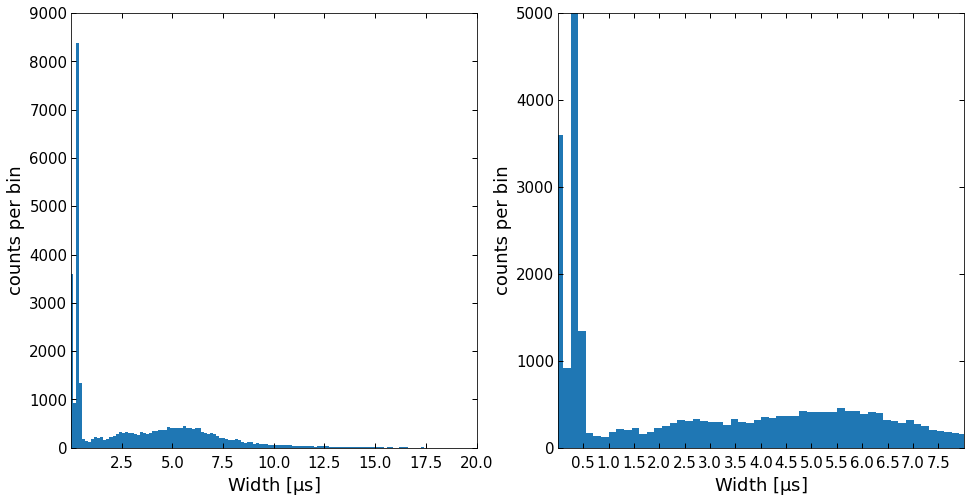

In [60]:
# Check the signal width
%matplotlib inline
fig3, ax3 = plt.subplots(1, 2, figsize = (16., 8.))
n, bins, patches = ax3[0].hist(np.asarray(width_NG)/100., 1000)
ax3[0].set_ylim(0., 9000)
ax3[0].set_xlim(0., 20)
ax3[0].set_ylabel("counts per bin", fontsize = 18)
ax3[0].set_xlabel('Width '+ r'$[\mathrm{\mu s}]$', fontsize = 18)
ax3[0].set_xticks(np.arange(2.5, 20.1, 2.5))
n2, bins2, patches2 = ax3[1].hist(np.asarray(width_NG)/100., 1000)
ax3[1].set_ylim(0., 5000)
ax3[1].set_xlim(0., 8.)
ax3[1].set_xticks(np.arange(0.5, 8., 0.5))
ax3[1].set_ylabel("counts per bin", fontsize = 18)
ax3[1].set_xlabel('Width '+ r'$[\mathrm{\mu s}]$', fontsize = 18)

fig2.savefig('Width_NG.png', dpi = 300)

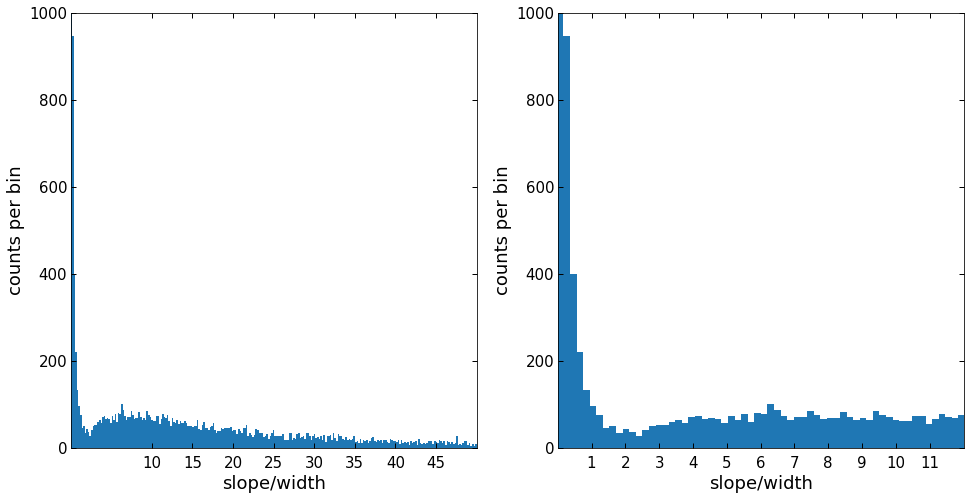

In [67]:
# Check the signal width
%matplotlib inline
fig4, ax4 = plt.subplots(1, 2, figsize = (16., 8.))
n3, bins3, patches3 = ax4[0].hist(-np.asarray(sw_NG), 1000)
ax4[0].set_ylim(0., 1000)
ax4[0].set_xlim(0., 50)
ax4[0].set_ylabel("counts per bin", fontsize = 18)
ax4[0].set_xlabel('slope/width', fontsize = 18)
ax4[0].set_xticks(np.arange(10, 50, 5))
n4, bins4, patches4 = ax4[1].hist(-np.asarray(sw_NG), 1000)
ax4[1].set_ylim(0., 1000)
ax4[1].set_xlim(0., 12.)
ax4[1].set_xticks(np.arange(1, 12., 1))
ax4[1].set_ylabel("counts per bin", fontsize = 18)
ax4[1].set_xlabel('slope/width', fontsize = 18)

fig2.savefig('sw_NG.png', dpi = 300)